In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_iris.csv')

In [4]:
df

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2
...,...,...,...,...,...,...
95,147,6.5,3.0,5.2,2.0,2
96,124,6.7,3.3,5.7,2.1,2
97,123,6.3,2.7,4.9,1.8,2
98,146,6.3,2.5,5.0,1.9,2


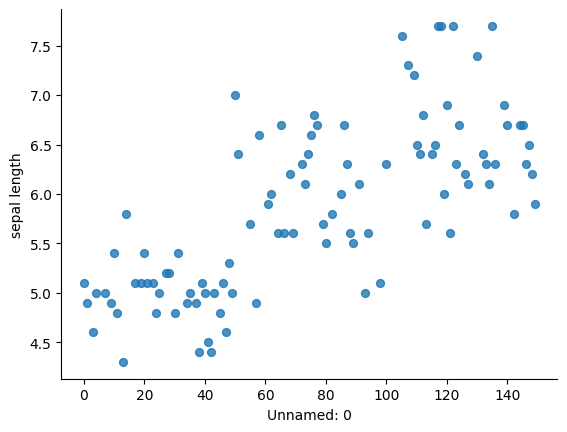

In [5]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Unnamed: 0', y='sepal length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

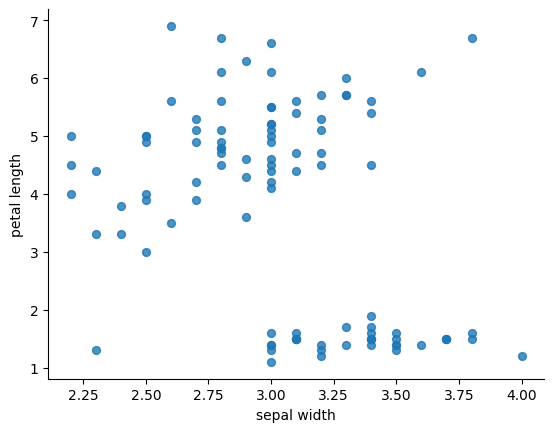

In [6]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='sepal width', y='petal length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

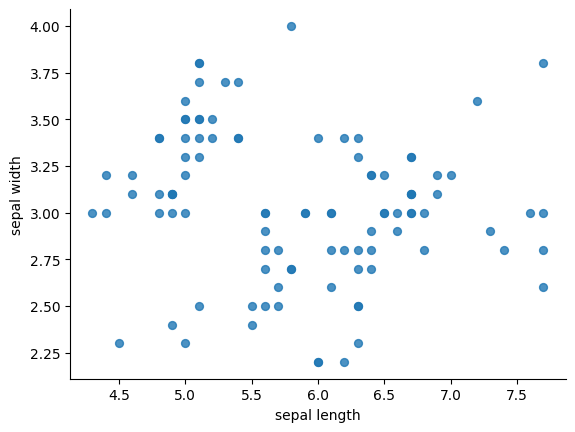

In [7]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='sepal length', y='sepal width', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

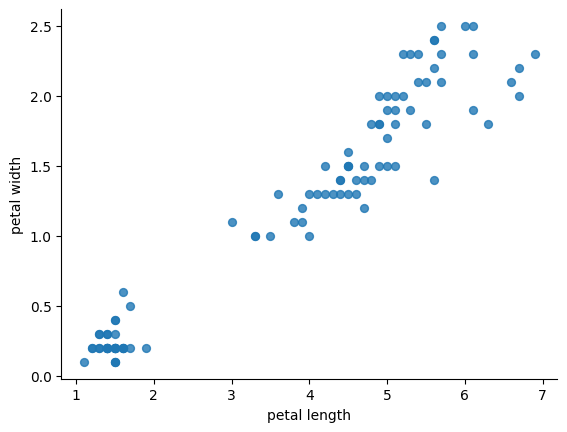

In [8]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='petal length', y='petal width', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
df.isnull().sum()

,0
Unnamed: 0,0
sepal length,0
sepal width,0
petal length,0
petal width,0
species,0


In [10]:
from sklearn import tree

In [11]:
X = df.drop(["species"], axis=1)
y = df.species

scores = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

for depth in range(1, 100):
  clf = tree.DecisionTreeClassifier(max_depth=depth)
  clf.fit(X_train, y_train)
  train_score = clf.score(X_train, y_train)
  test_score = clf.score(X_test, y_test)

  temp_score_data = {'max_depth': depth,
                      'train_score': train_score,
                      'test_score': test_score}

  scores.append(temp_score_data)


In [12]:
scores = pd.DataFrame(scores)

In [13]:
scores.head()

,max_depth,train_score,test_score
0,1,0.716418,0.666667
1,2,1.000000,0.909091
2,3,1.000000,0.969697
3,4,1.000000,0.969697
4,5,1.000000,0.909091


In [14]:
melted_scores = pd.melt(scores, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                        var_name='set_type', value_name='score')

In [15]:
import seaborn as sns

<Axes: xlabel='max_depth', ylabel='score'>

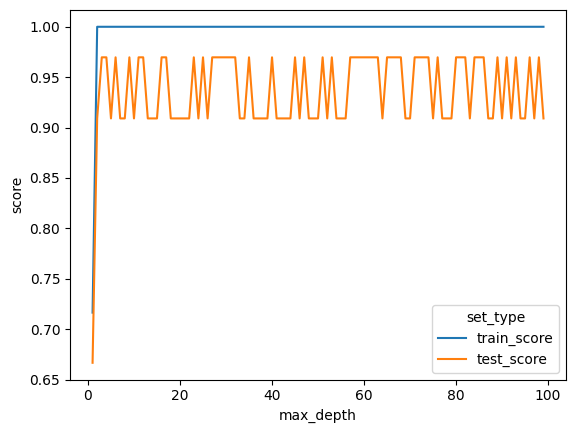

In [16]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=melted_scores)